In [105]:
import pandas as pd 
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import squarify 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score , KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor

In [59]:
#read the filt 
df=pd.read_csv('C:/Users/somah/Downloads/My project dataset/Data.csv')

In [60]:
#how many rows and columns 
df.shape

(24898, 17)

In [61]:
# Data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24898 entries, 0 to 24897
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Start Time              24898 non-null  object 
 1   End Time                24898 non-null  object 
 2   Lifestyle Category      24898 non-null  object 
 3   Campaign Id             24898 non-null  object 
 4   Campaign Name           24898 non-null  object 
 5   Daily Budget            24898 non-null  int64  
 6   File Type               24898 non-null  object 
 7   Campaign Active Status  24898 non-null  object 
 8   Amount Spent            24898 non-null  float64
 9   Result                  24898 non-null  int64  
 10  Result Type             24898 non-null  object 
 11  Cost Per Result         24898 non-null  float64
 12  Cost Per Result Type    24898 non-null  object 
 13  Paid Impressions        24898 non-null  int64  
 14  Paid eCPM               24898 non-null

In [62]:
df.head(5)

,Start Time,End Time,Lifestyle Category,Campaign Id,Campaign Name,Daily Budget,File Type,Campaign Active Status,Amount Spent,Result,Result Type,Cost Per Result,Cost Per Result Type,Paid Impressions,Paid eCPM,Swipe Ups,eCPSU
0,2022-05-02 00:00:00 AST,2022-05-03 00:00:00 AST,Women's Lifestyle,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,9.70,23182,total_impressions,0.42,TOTAL_CPM,23182,0.42,42,0.23
1,2022-05-02 00:00:00 AST,2022-05-03 00:00:00 AST,Automotive Shoppers,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,5.03,12075,total_impressions,0.42,TOTAL_CPM,12075,0.42,17,0.30
2,2022-05-02 00:00:00 AST,2022-05-03 00:00:00 AST,Social Drinkers,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,0.14,358,total_impressions,0.40,TOTAL_CPM,358,0.40,0,0.00
3,2022-05-02 00:00:00 AST,2022-05-03 00:00:00 AST,Beer Drinkers,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,0.16,395,total_impressions,0.41,TOTAL_CPM,395,0.41,0,0.00
4,2022-05-02 00:00:00 AST,2022-05-03 00:00:00 AST,Wine Enthusiasts,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,0.16,380,total_impressions,0.41,TOTAL_CPM,380,0.41,2,0.08


# Pre-processing 

In [63]:
#check the NA value 
df.isna().sum()

Start Time                0
End Time                  0
Lifestyle Category        0
Campaign Id               0
Campaign Name             0
Daily Budget              0
File Type                 0
Campaign Active Status    0
Amount Spent              0
Result                    0
Result Type               0
Cost Per Result           0
Cost Per Result Type      0
Paid Impressions          0
Paid eCPM                 0
Swipe Ups                 0
eCPSU                     0
dtype: int64

In [64]:
#check the duplicate
df.duplicated().sum()

0

In [65]:
#  How many Lifestyle Category in the data 
df['Campaign Name'].value_counts()

Campaign 7    7552
Campaign 8    4248
Campaign 4    3068
Campaign2     2950
Campaign 3    2832
Campaign 5    2242
Campaign 6    1534
Campaign1      472
Name: Campaign Name, dtype: int64

In [66]:
#  How many Lifestyle Category in the data 
df['Lifestyle Category'].value_counts()

Women's Lifestyle            211
Business News Watchers       211
Online Shoppers              211
Luxury Shoppers              211
Department Store Shoppers    211
                            ... 
Beachgoers & Surfers         211
Automotive Enthusiasts       211
Arts & Culture Mavens        211
Adventure Seekers            211
Frequent Travelers           211
Name: Lifestyle Category, Length: 118, dtype: int64

In [67]:
# new columns for days and month 
df["Start Time"] = df["Start Time"].str[:-4]
df["End Time"] = df["End Time"].str[:-4]
df["Start Time"].head(2)

0    2022-05-02 00:00:00
1    2022-05-02 00:00:00
Name: Start Time, dtype: object

In [68]:

# change datatype 
df["Start Time"] = pd.to_datetime(df['Start Time'], format='%Y-%m-%d %H:%M:%S')
df["End Time"] = pd.to_datetime(df['End Time'], format='%Y-%m-%d %H:%M:%S')
df["weekday"] = df["Start Time"].dt.day_name()
# we will focus on start Date and extract months and years with it 
df["months"] = df["Start Time"].dt.month_name()
df["year"] = df["Start Time"].dt.year
df['Day']=df['Start Time'].dt.day
# Column for Day and month 
cols=["months","Day"]
df['Day-month'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df.head(3)

,Start Time,End Time,Lifestyle Category,Campaign Id,Campaign Name,Daily Budget,File Type,Campaign Active Status,Amount Spent,Result,...,Cost Per Result Type,Paid Impressions,Paid eCPM,Swipe Ups,eCPSU,weekday,months,year,Day,Day-month
0,2022-05-02,2022-05-03,Women's Lifestyle,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,9.70,23182,...,TOTAL_CPM,23182,0.42,42,0.23,Monday,May,2022,2,May-2
1,2022-05-02,2022-05-03,Automotive Shoppers,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,5.03,12075,...,TOTAL_CPM,12075,0.42,17,0.30,Monday,May,2022,2,May-2
2,2022-05-02,2022-05-03,Social Drinkers,2fa98bb3-35be-4901-a678-e4dc21abd81c,Campaign1,15,mp4,Active,0.14,358,...,TOTAL_CPM,358,0.40,0,0.00,Monday,May,2022,2,May-2


# EDA

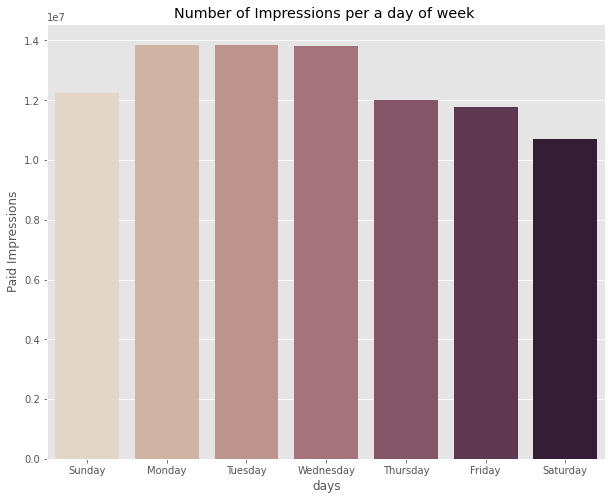

In [69]:
# Number of Impressions per a day of week
days_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
fig = plt.figure(figsize=(10,8))

sns.barplot(data=df,
            x="weekday", 
            y="Paid Impressions", 
            palette="ch:.25",
            ci=None,
            estimator=sum,
            order = days_order
            
           )

plt.title('Number of Impressions per a day of week ')
plt.xlabel('days')

plt.show()

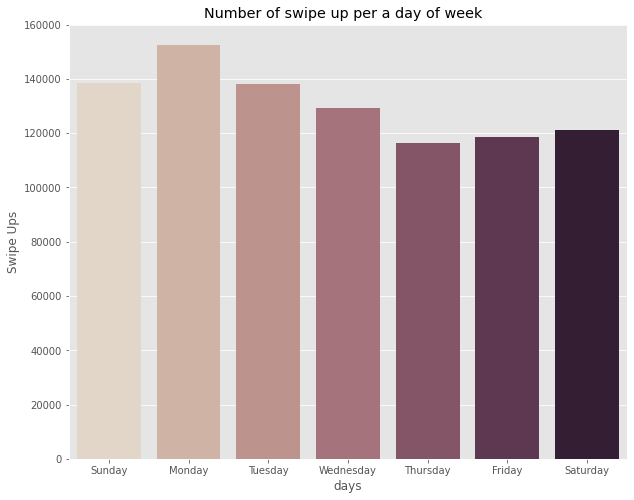

In [70]:
# Number of swipe up per a day of week
fig = plt.figure(figsize=(10,8))

sns.barplot(data=df,
            x="weekday", 
            y="Swipe Ups", 
            palette="ch:.25",
            ci=None,
            estimator=sum,
            order = days_order
           )


plt.title('Number of swipe up per a day of week  ')
plt.xlabel('days')
plt.show();



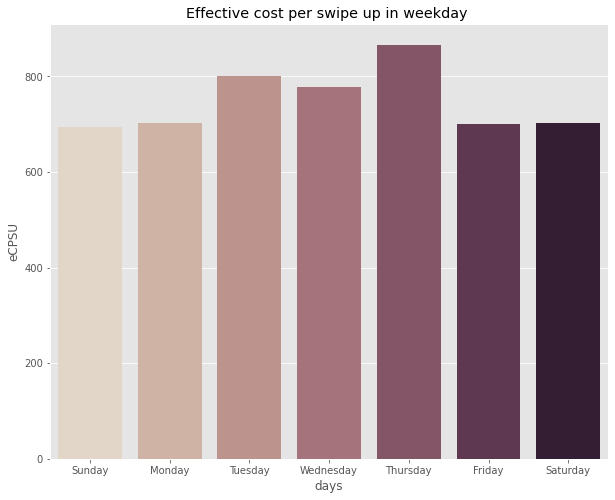

In [71]:
# Effective cost per swipe up in weekday
fig = plt.figure(figsize=(10,8))

sns.barplot(data=df,
            x="weekday", 
            y="eCPSU", 
            palette="ch:.25",
            ci=None,
            estimator=sum,
            order = days_order
           )


plt.title('Effective cost per swipe up in weekday ')
plt.xlabel('days')
plt.show();



In [72]:
df_lifesyle = df.groupby(["Lifestyle Category"])["Swipe Ups"].sum().reset_index().sort_values("Swipe Ups",ascending=False).head(20)
df_lifesyle

,Lifestyle Category,Swipe Ups
74,News Watchers,27825
47,Film & Tv Fans,26908
72,Music Fans,24876
49,Foodies,24526
110,Travel Enthusiasts,24300
92,Shoppers,23416
100,Sports Fans,21402
44,Fashion & Style Gurus,21081
63,Investors & Entrepreneurs,18805
1,Adventure Seekers,17828


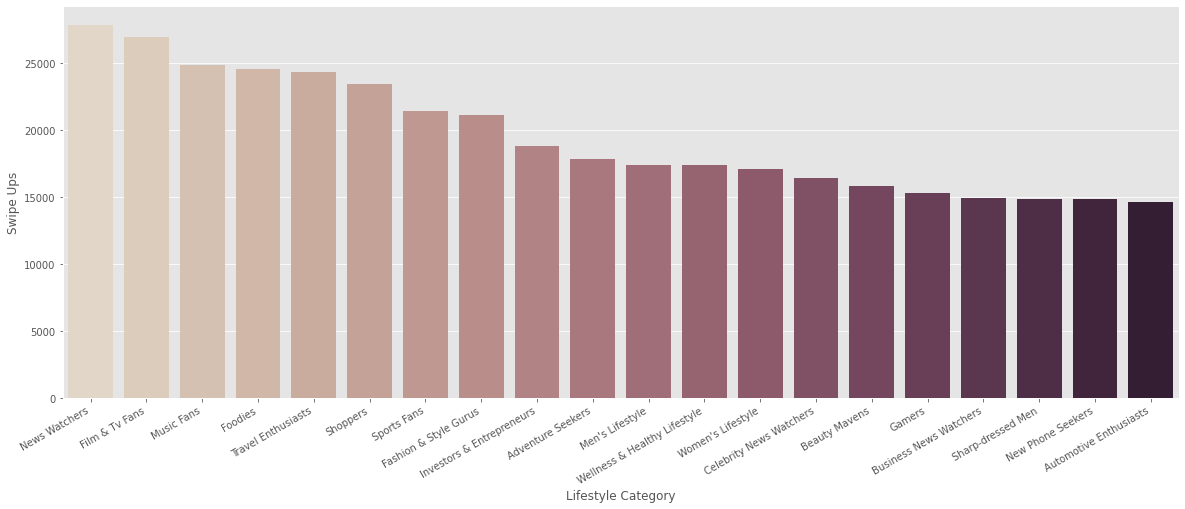

In [73]:
# Highest Lifestyle swipe up 
fig = plt.figure(figsize=(20,8))

sns.barplot(data=df_lifesyle,
            x="Lifestyle Category", 
            y="Swipe Ups", 
            palette="ch:.25",
            ci=None,
           )

fig.autofmt_xdate()

plt.show();

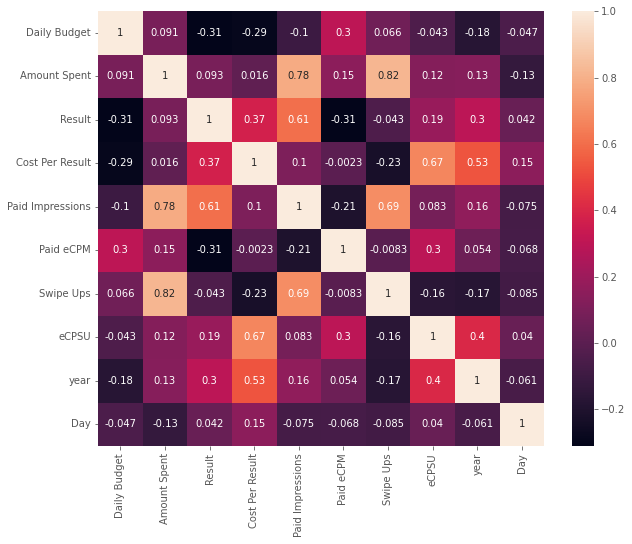

In [74]:
 # corrolation 
corr = df.corr()
fig = plt.figure(figsize=(10,8))
sns.color_palette("ch:.25", as_cmap=True)
sns.heatmap(corr,  annot= True);
 

In [75]:

Campaign=['Campaign1','Campaign2','Campaign 3','Campaign 4','Campaign 5','Campaign 6','Campaign 7', 'Campaign 8']
Day= list()
Total_spend=list()
Swipup=list()
Impressions=list()
spend_week=list()
for i in range(8):
  Campaign8=df.loc[df['Campaign Name']== Campaign[i]].copy()
  # How many days the campaign work
  Day.append((Campaign8['Start Time'].max()- Campaign8['Start Time'].min()).days)
  # the total amount 
  Total_spend.append(Day[i]*Campaign8['Daily Budget'].iloc[0])
  # Swipe up rate in a week 
  Swipup.append(int((Campaign8['Swipe Ups'].sum()*7)/Day[i]))
  # Impressions rate in a week 
  Impressions.append(int((Campaign8['Paid Impressions'].sum()*7)/Day[i]))
  # Amount during the week 
  spend_week.append(7*Campaign8['Daily Budget'].iloc[0])

    
 

In [76]:
dict = {'Campaign Name': Campaign , 'Days': Day, 'Total amount $': Total_spend ,'Swipe up_week':Swipup ,'Impressions_week':Impressions , 'amount_week $':spend_week} 
    
Campaign_performance = pd.DataFrame(dict)

In [77]:
Campaign_performance

,Campaign Name,Days,Total amount $,Swipe up_week,Impressions_week,amount_week $
0,Campaign1,3,45,8519,6487530,105
1,Campaign2,32,480,8656,3895864,105
2,Campaign 3,23,230,40646,2578228,70
3,Campaign 4,100,2500,4553,410551,175
4,Campaign 5,18,450,13818,2113517,175
5,Campaign 6,15,300,44524,2360858,140
6,Campaign 7,81,2430,29630,2074127,210
7,Campaign 8,45,1125,30915,2928723,175


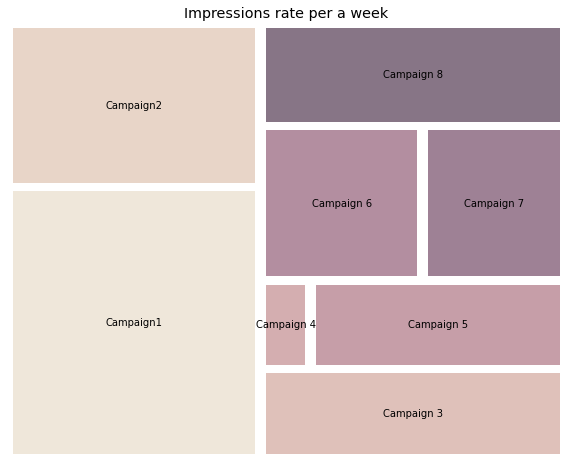

In [78]:
# vis the Campaign vs Impressions_week rate per a week 
sizes=Campaign_performance['Impressions_week']
label=Campaign_performance['Campaign Name']
fig = plt.figure(figsize=(10,8))
squarify.plot(sizes=sizes, label=label, alpha=0.6 ,color=sns.color_palette("ch:.25", len(sizes)),pad=2)
plt.title('Impressions rate per a week')
plt.axis('off')
plt.show()

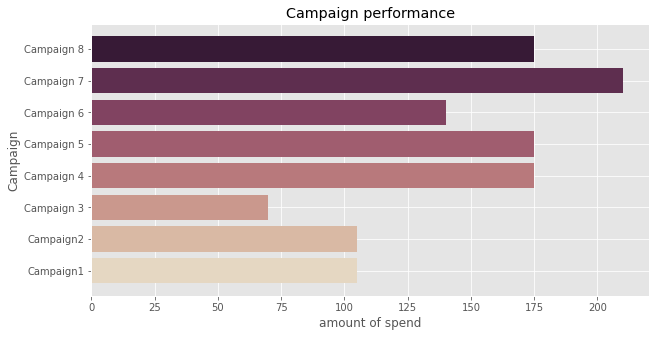

In [79]:
# How much each campaign spend in a week 
fig = plt.figure(figsize=(10, 5))
plt.barh(Campaign_performance['Campaign Name'],Campaign_performance['amount_week $'],color=sns.color_palette("ch:.25",len(sizes)))
plt.title('Campaign performance')
plt.ylabel('Campaign')
plt.xlabel('amount of spend')
plt.show()

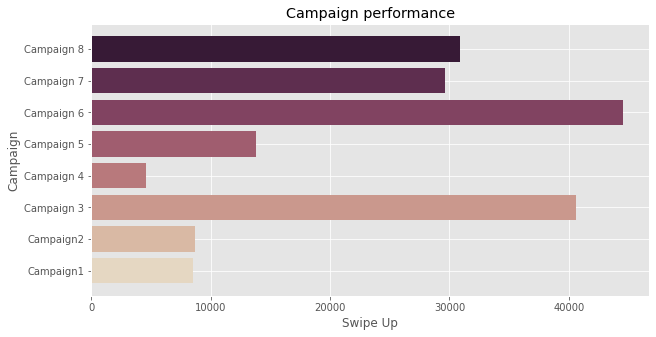

In [80]:
# Which campaigns get highast number of Swipe up  
fig = plt.figure(figsize=(10, 5))
plt.barh(Campaign_performance['Campaign Name'],Campaign_performance['Swipe up_week'],color=sns.color_palette("ch:.25",len(sizes)))
plt.title('Campaign performance')
plt.ylabel('Campaign')
plt.xlabel('Swipe Up')
plt.show()

#  Feature engeneering 

In [81]:
cols = ['Lifestyle Category','Daily Budget','File Type ','Amount Spent',
        'Swipe Ups','weekday', 'months', 'year','Paid Impressions']
#Paid eCPM 
df_copy = df[cols].copy()
df_copy

,Lifestyle Category,Daily Budget,File Type,Amount Spent,Swipe Ups,weekday,months,year,Paid Impressions
0,Women's Lifestyle,15,mp4,9.70,42,Monday,May,2022,23182
1,Automotive Shoppers,15,mp4,5.03,17,Monday,May,2022,12075
2,Social Drinkers,15,mp4,0.14,0,Monday,May,2022,358
3,Beer Drinkers,15,mp4,0.16,0,Monday,May,2022,395
4,Wine Enthusiasts,15,mp4,0.16,2,Monday,May,2022,380
...,...,...,...,...,...,...,...,...,...
24893,Water Sport Enthusiasts,10,mov,0.08,2,Monday,July,2021,51
24894,Techies & Gadget Fans,10,mov,1.54,14,Monday,July,2021,1048
24895,Travel Enthusiasts,10,mov,1.97,22,Monday,July,2021,1257
24896,Family Travelers,10,mov,1.30,20,Monday,July,2021,681


In [84]:
# Use labal encoder for categocical feature
le = LabelEncoder()
df_copy["Lifestyle Category"] = le.fit_transform(df_copy["Lifestyle Category"])

In [85]:
# Dummy encoding 
df_copy = pd.get_dummies(df_copy,columns = ["File Type ",'weekday','months','year'])

In [87]:
# create train/test split
train, test = train_test_split(df_copy, train_size=0.7, random_state=123)
# separate features from labels and only use numeric features
X_train = train.drop("Swipe Ups", axis=1)
y_train = train[["Swipe Ups"]]
X_test= test.drop("Swipe Ups", axis=1)
y_test = test[["Swipe Ups"]]
X=df_copy.drop("Swipe Ups", axis=1)
Y=df_copy[["Swipe Ups"]]

In [89]:
#reate scaler object
scaler_mm = MinMaxScaler()
X[["Daily Budget","Amount Spent",'Paid Impressions']] = scaler_mm.fit_transform(X[["Daily Budget","Amount Spent",'Paid Impressions']])
X_train[["Daily Budget","Amount Spent",'Paid Impressions']] = scaler_mm.fit_transform(X_train[["Daily Budget","Amount Spent",'Paid Impressions']])
X_test[["Daily Budget","Amount Spent",'Paid Impressions']] = scaler_mm.transform(X_test[["Daily Budget","Amount Spent",'Paid Impressions']])

# ML model

In [93]:
# Linear Regression model 
reg = LinearRegression()
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(reg, X_train, y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')

Scores for each fold: [-458.53650396 -437.34751435 -426.31785833 -355.02667329 -403.24460079]


In [94]:
# Evaluate the linear regression model 
results =np.absolute(score.mean()) 
print('"MSE" mean_squared_error :',results) 
print('RMSE:', np.sqrt(results))

"MSE" mean_squared_error : 416.0946301420719
RMSE: 20.398397734676905


In [95]:
# set the Random Forest Regression Hyperparameter

random_grid = {'n_estimators': [5,20,50,100] # number of trees in the random forest
,'max_features': ['auto', 'sqrt'] # number of features in consideration at every split
,'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
,'min_samples_split':[2, 6, 10] # minimum sample number to split a node
 ,'min_samples_leaf':[1, 3, 4] # minimum sample number that can be stored in a leaf node
 ,'bootstrap':[True, False] # method used to sample data points
  }


In [97]:
## Importing Random Forest Classifier from the sklearn.ensemble
rf = RandomForestRegressor()

In [98]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [99]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\somah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
c:\Users\somah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [100]:
#Print the best parameters
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True}  



In [101]:
# Using the best parameters
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 120, bootstrap=True) 
randmf.fit( X_train, y_train) 

C:\Users\somah\AppData\Local\Temp\ipykernel_5444\2931768395.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randmf.fit( X_train, y_train)
c:\Users\somah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=120, max_features='auto')

In [102]:
rfr_pred= randmf.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 5.315614457831325
MSE: 84.91427917001337
RMSE: 9.214894419905926


In [106]:
# XGBoost Regressor
xgb_r = XGBRegressor(objective ='reg:linear', colsample_bytree = 1,eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2000)
xgb_r.fit(X_train, y_train)

[22:14:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', ...)

In [107]:
xgb_r.score(X_train, y_train)

0.994605111734764

In [108]:
XGB_pred = xgb_r.predict(X_test)

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, XGB_pred))
print('MSE:', metrics.mean_squared_error(y_test, XGB_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, XGB_pred)))

MAE: 5.235148942942726
MSE: 78.44996148485419
RMSE: 8.857198286413949
